# Desafio Telecomx_BR!

Neste notebook, vamos estar realizando as etapas destacadas para conclusão do desafio Telecomx_BR.

Primeiramente, vamos baixar os dados para não ficar subindo os dados de forma manual

In [ ]:
!curl -o ./data.json https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3717k  100 3717k    0     0  13.2M      0 --:--:-- --:--:-- --:--:-- 13.2M


# Imports das bibliotecas necessárias

Antes de tudo, esta seção vai fazer a importação das bibliotecas que serão necessárias ao longo da resolução do desafio.

In [ ]:
import json

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Extração dos dados

Após análise prelimiar, viu-se que os dados presentes no JSON `data.json` estão estruturados como registros em uma lista e que ele possui itens aninhados. Desta forma, não podemos simplesmente ler esses dados usando uma estrutura do pandas!

Todavia, é mais simples trabalhar com dados numa estrutura tabular, principalmente para as análises posteriores que serão feitas. Dessa forma, vamos reestruturar o dicionário para que ele não tenha mais estruturas aninhadas e possamos fazer a leitura dos seus dados usando `pandas` de forma tabular.

In [ ]:
# Função recursiva para desaninhar o dicionário
def unnest_dict(d, parent_key='', sep='_') -> dict:
    """
    Transforma um dicionário com items aninhados em um dicionário flat.

    Args:
        d (dict): o dicionário a ser desaninhado.
        parent_key (str): nome da chave parente do dicionário recebido. Se for o
          primeiro dicionário da desaninhação, seu valor é vazio ''.
        sep (str): O caractere que fará a separação dos valores aninhados.

    Returns:
        dict: The flattened dictionary.
    """
    items = []
    for k, v in d.items():
        new_key = parent_key + sep + k if parent_key else k
        # Se o valor de um par chave-valor do dicionário também for um dicionário,
        # a função se chama de forma recursiva para lidar com
        if isinstance(v, dict):
            items.extend(unnest_dict(v, new_key, sep=sep).items())
        else:
            items.append((new_key, v))
    return dict(items)

In [ ]:
# Lê o arquivo dos dados
with open('./data.json', 'r', encoding='utf8') as f:
    raw_data = json.load(f)

# Desaninha os dados
unnested_data = [unnest_dict(item) for item in raw_data]

# Transforma os dados em um dataframe
data = pd.DataFrame(unnested_data)

In [ ]:
# Os itens aninhados também tem refência com um grupo, entã vamos deixar estes
# itens salvos para agrupamentos posteriores
grouping_itens = ['customer_', 'phone_', 'internet_', 'account_']

In [ ]:
# Dando uma breve olhada nos dados

print("As dimensões dos dados são: ", data.shape)
data.head()

As dimensões dos dados são:  (7267, 21)


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Visualização dos dados
Uma forma mais fácil de visualizar estes dados é observando primeiramente asinformações por grupos. Vamos fazer isso neste exercício de visualização.

In [ ]:
all_groups_alternative_regex = "|".join(grouping_itens)
no_group_regex_expression = r'^(?!.*({})).*'.format(all_groups_alternative_regex)
display(data.filter(regex=no_group_regex_expression).head())

for group in grouping_itens:
    print("Colunas com o grupo ", group)
    display(data.filter(regex=group).head())
    print()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


Colunas com o grupo  customer_


,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3



Colunas com o grupo  phone_


,phone_PhoneService,phone_MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No



Colunas com o grupo  internet_


,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No



Colunas com o grupo  account_


,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


De cara já conseguimos ver que temos várias colunas binárias (Sim/Não) e outras que podem conter mais de um valor. Algumas são colunas com valores numéricos, outras são simplesmente colunas que podem ser categorizadas posteriormente, dependendo do seu grau de cardinalidade (quantidade de valores diferentes presentes para cada característica). Vamos avaliar como está a cardinalidade, bem como a questão dos dados faltantes, nos nossos dados para pensarmos, posteriormente, em como transformá-los em dados numéricos e trabalhar com seu tratamento.

In [ ]:
# Recupera a quantidade de valores por caracteristica
nunique_values = data.select_dtypes(
    exclude=[int, float]).nunique().sort_values(ascending=False)
# Muda o nome da pd.Serie retornada
nunique_values.name = "nunique"
nan_count_values = data.select_dtypes(exclude=[int, float]).isna().sum()
nan_count_values.name = "nan_count"

display(
    pd.concat([nunique_values, nan_count_values[nunique_values.index]], axis=1))

,nunique,nan_count
customerID,7267,0
account_Charges_Total,6531,0
account_PaymentMethod,4,0
Churn,3,0
internet_OnlineBackup,3,0
internet_OnlineSecurity,3,0
internet_TechSupport,3,0
internet_DeviceProtection,3,0
internet_InternetService,3,0
phone_MultipleLines,3,0


Podemos tomar algumas conclusões desse resultado:
- Account_Charges_total parece que possui valores que não são definidos como float. Pode ser que existam valores nulos ou inconsistentes que devem ser avaliados posteriormente.
- Do grupo de itens da `internet`, com exceção do campo `InternetService`, todos os outros deveriam ser valores de Sim ou Não. Deve-se investigar se o terceiro valor é valor Nulo ou outra inconsistência.
- Deve-se investigar se realmente é normal uma cardinalidade = 4 na característica `account_PaymentMethod`.
- Não temos dados faltantes com `Null`!

Vamos endereçar essas dúvidas nas próximas linhas

In [ ]:
print(len(data.account_Charges_Total))
print(len(data.account_Charges_Total.dropna()))

7267
7267


Não possuem dados nulos na característica `account_Charges_Total`. Vamos ver se existem textos

In [ ]:
data.account_Charges_Total.astype(float)

,account_Charges_Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


Vemos que estamos com um problema nos dados do account_Charges_total, uma vez que a coluna apresenta um valor vazio de string (`' '`) no meio dos dados. O que será feito vai ser transformar este valor em NaN e transformar a coluna toda em tipo float

In [ ]:

data['account_Charges_Total'] = pd.to_numeric(data.account_Charges_Total.replace(' ', np.nan), errors='coerce')

Vamos ver as demais características:

In [ ]:
elevated_cardinallity_cols = nunique_values[(nunique_values > 2) & (nunique_values < 5)].index
for c in elevated_cardinallity_cols:
    display(data[c].value_counts())

,count
account_PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


,count
Churn,
No,5174
Yes,1869
,224


,count
internet_OnlineBackup,
No,3182
Yes,2504
No internet service,1581


,count
internet_OnlineSecurity,
No,3608
Yes,2078
No internet service,1581


,count
internet_TechSupport,
No,3582
Yes,2104
No internet service,1581


,count
internet_DeviceProtection,
No,3195
Yes,2491
No internet service,1581


,count
internet_InternetService,
Fiber optic,3198
DSL,2488
No,1581


,count
phone_MultipleLines,
No,3495
Yes,3065
No phone service,707


,count
internet_StreamingMovies,
No,2870
Yes,2816
No internet service,1581


,count
internet_StreamingTV,
No,2896
Yes,2790
No internet service,1581


,count
account_Contract,
Month-to-month,4005
Two year,1743
One year,1519


Infelizmente, não faz muito sentido transformar algumas destas colunas em 1 ou 0, uma vez que existe uma terceira classe que pode ser necessária, por exemplo, o usuário não possui o plano com internet. Estaremos, portanto, transformando estas colunas em categóricas

In [ ]:
categorical_cols = nunique_values[nunique_values < 5].index
data.loc[:, elevated_cardinallity_cols] = data[elevated_cardinallity_cols].astype('category')

Por fim, acredito que devemos remover todos os registros cujo valor Churn é vazio, pois Churn é a target da nossa análise.

In [ ]:
data = data[data['Churn'] != '']

In [ ]:
data['Contas Diárias'] = data.account_Charges_Monthly / 30

# Carga e análise
Vamos analisar os dados numéricos

In [ ]:
data.select_dtypes(include=[int, float, 'float64']).describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,Contas Diárias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


Vamos analisar os dados categóricos

In [ ]:
category_cols = data.select_dtypes(include=['object']).columns.tolist()
category_cols = [c for c  in category_cols if not c in  ['customerID', 'Churn']]
category_cols

['customer_gender',
 'customer_Partner',
 'customer_Dependents',
 'phone_PhoneService',
 'phone_MultipleLines',
 'internet_InternetService',
 'internet_OnlineSecurity',
 'internet_OnlineBackup',
 'internet_DeviceProtection',
 'internet_TechSupport',
 'internet_StreamingTV',
 'internet_StreamingMovies',
 'account_Contract',
 'account_PaperlessBilling',
 'account_PaymentMethod']

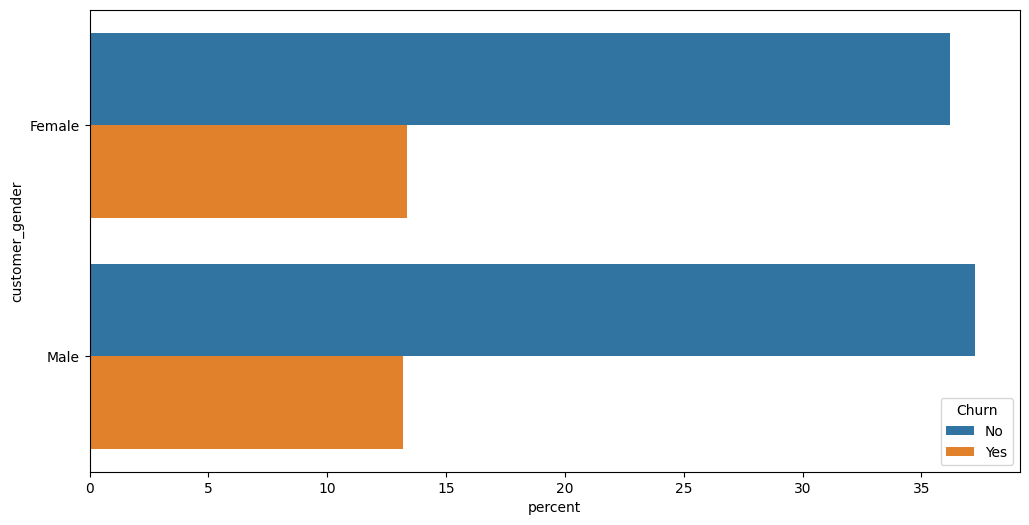

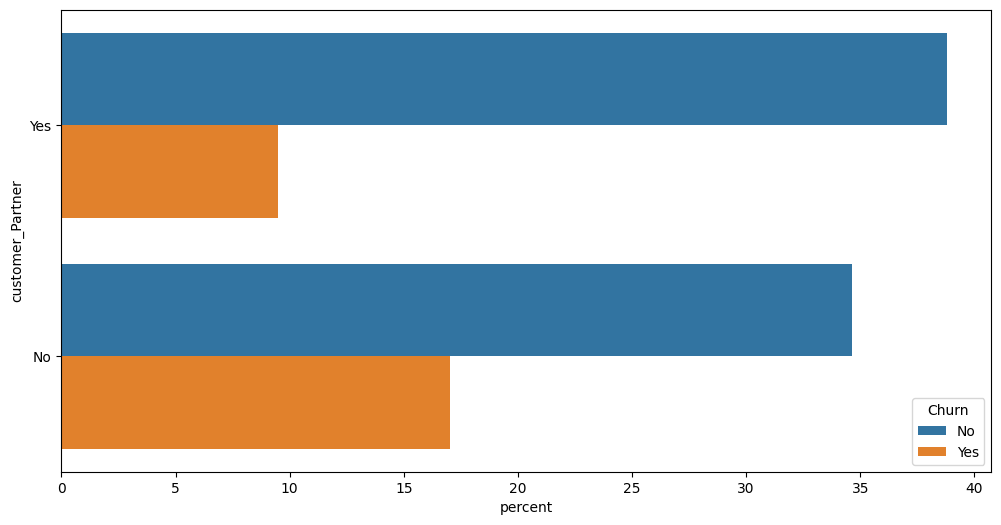

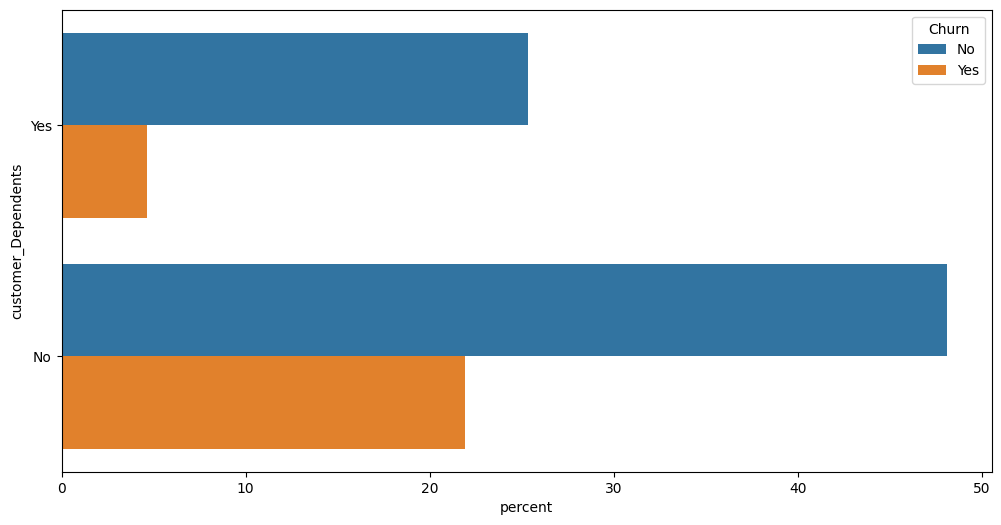

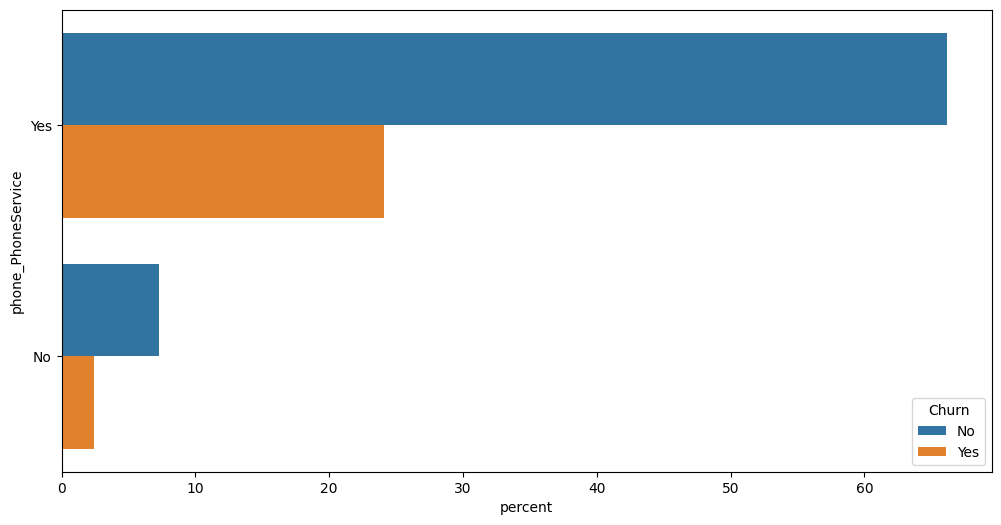

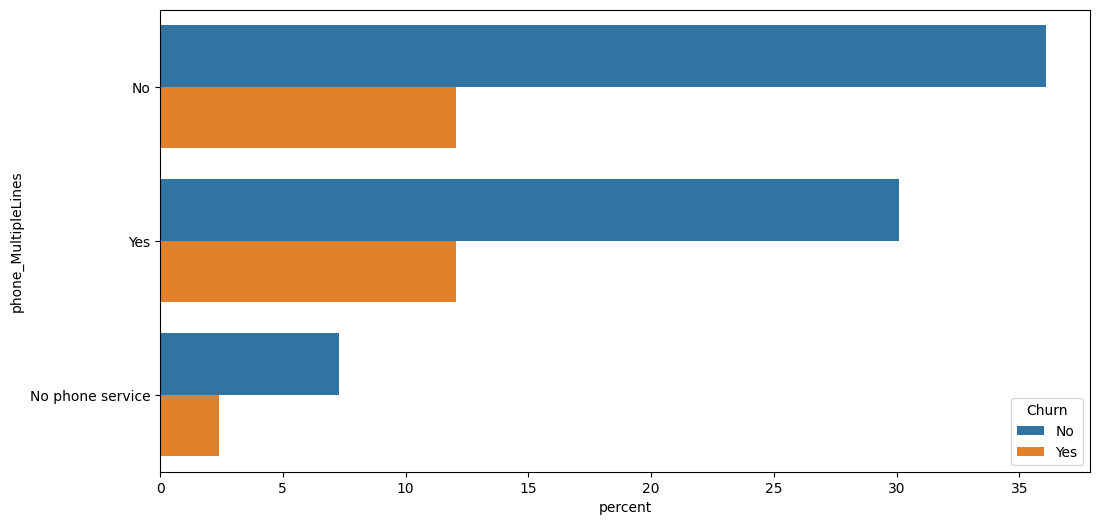

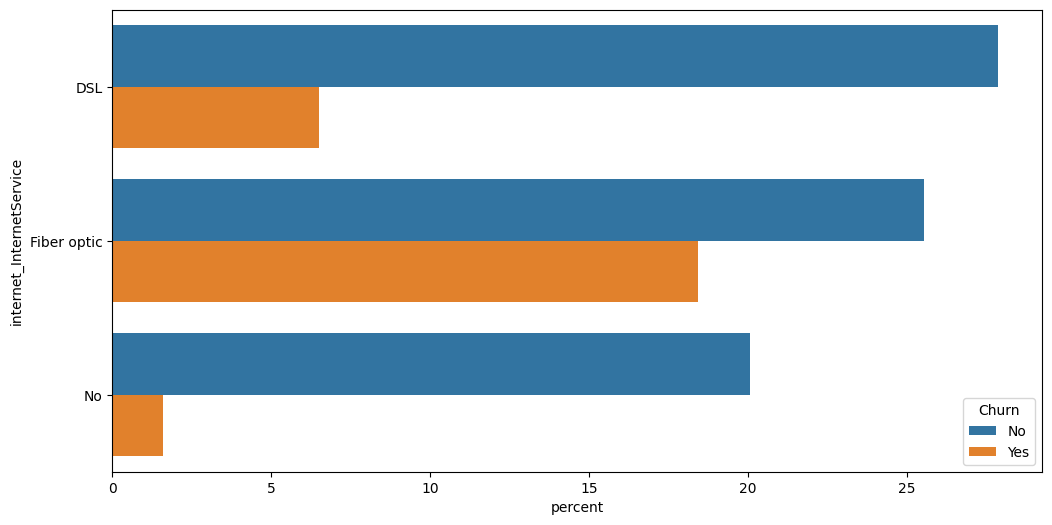

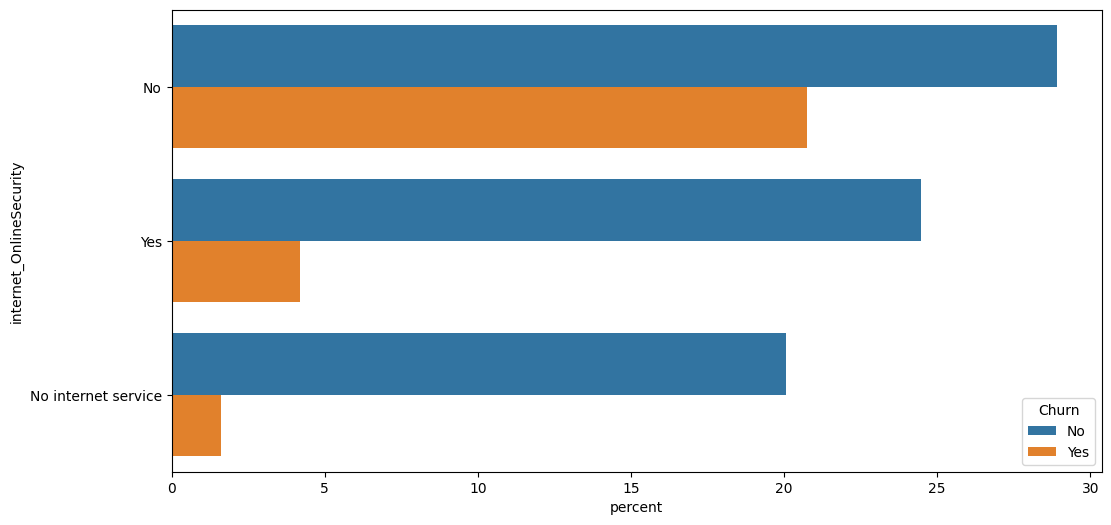

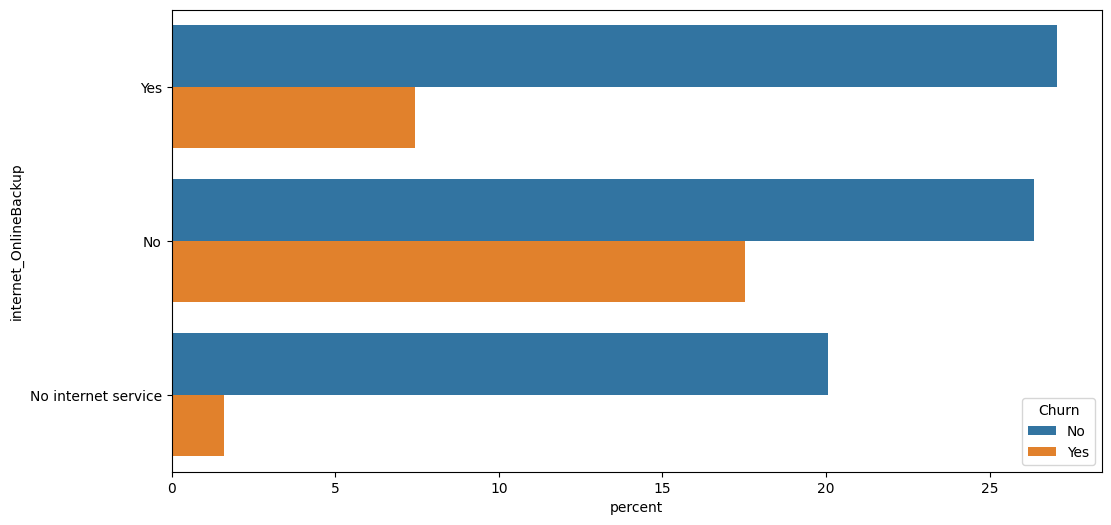

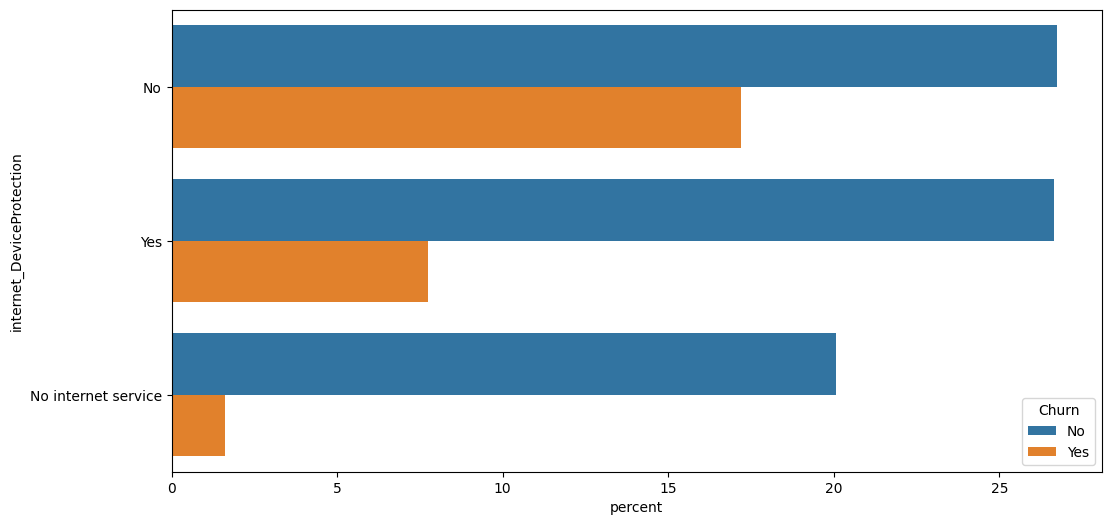

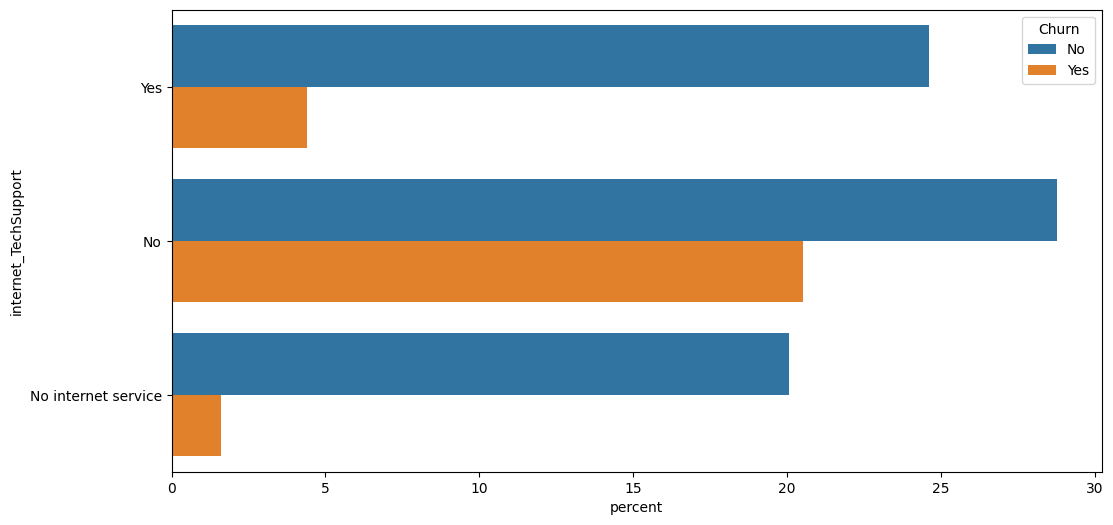

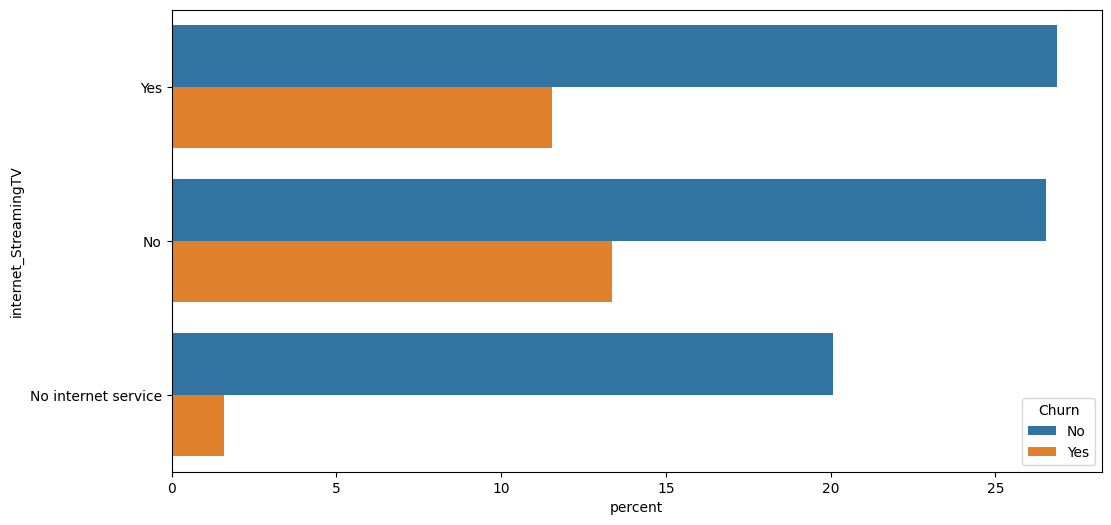

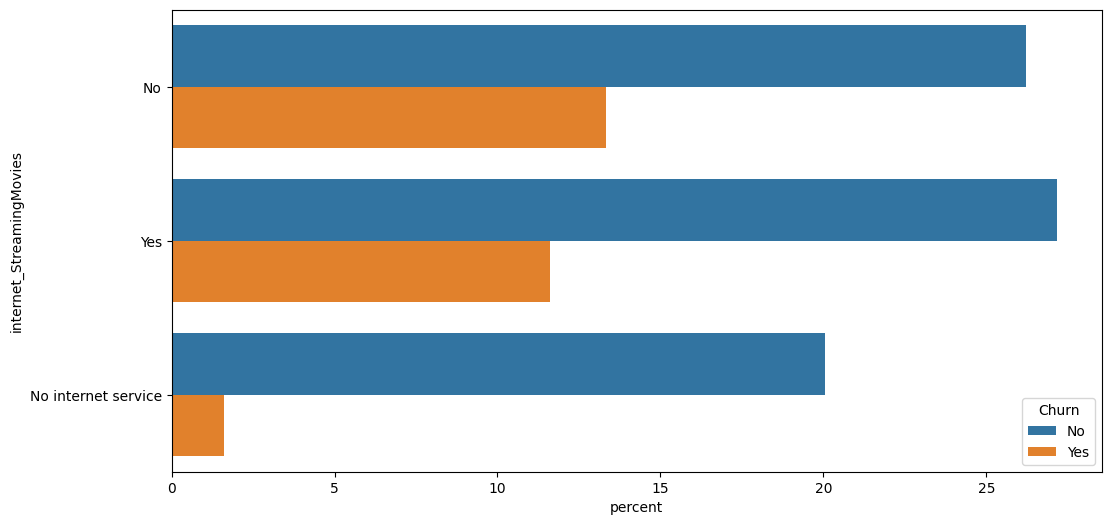

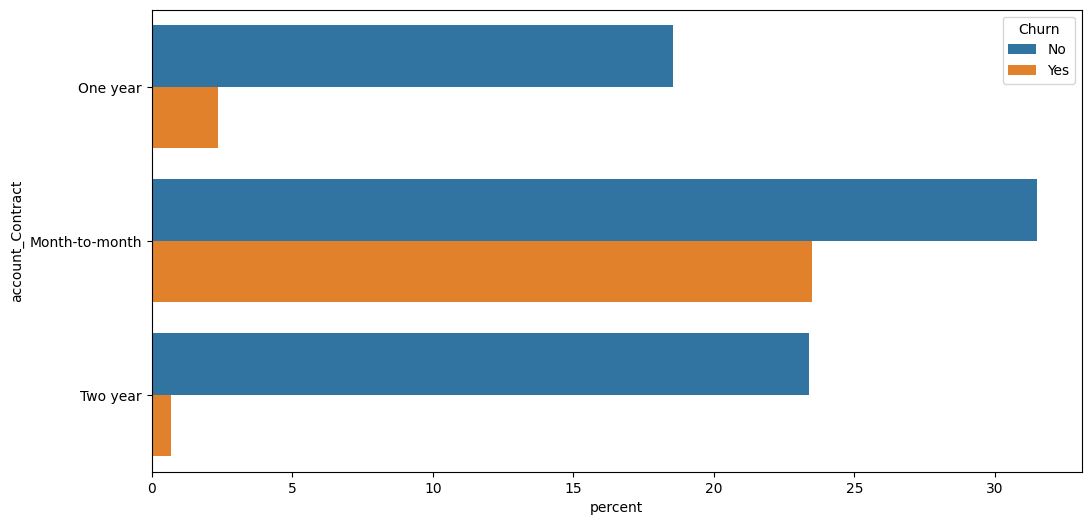

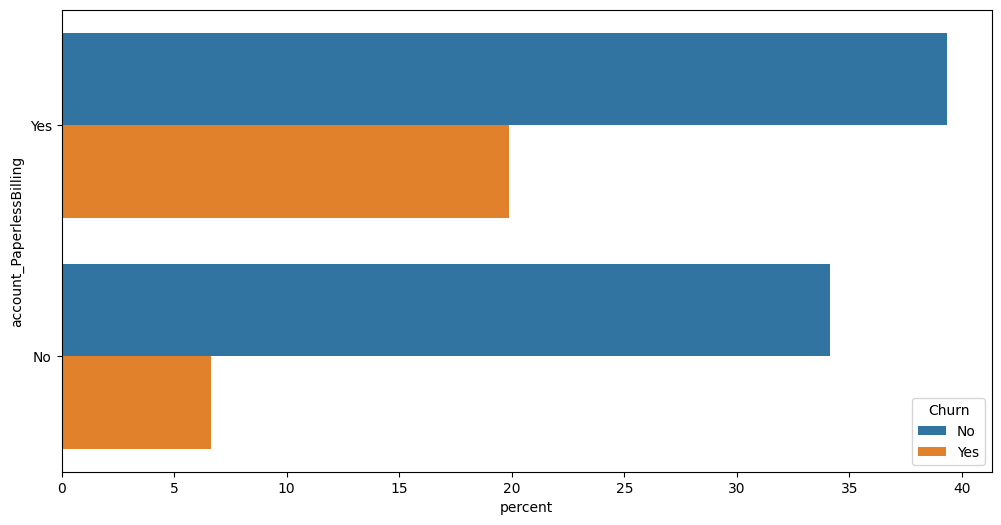

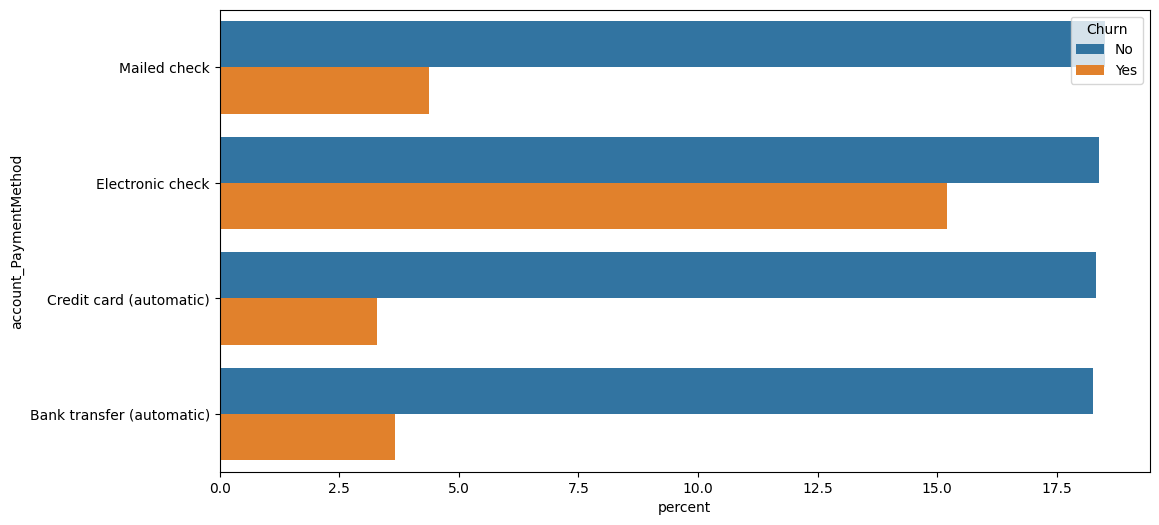

In [ ]:
for c in category_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data, y=c, hue="Churn", stat='percent')

Análise com as colunas numéricas

In [ ]:
numeric_cols = data.select_dtypes(include=[int, float, 'float64']).columns.tolist()
numeric_cols

['customer_SeniorCitizen',
 'customer_tenure',
 'account_Charges_Monthly',
 'account_Charges_Total',
 'Contas Diárias']

<Axes: xlabel='account_Charges_Total', ylabel='account_Charges_Monthly'>

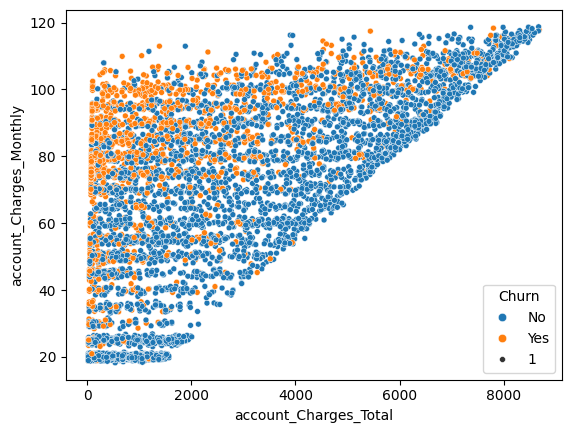

In [ ]:
sns.scatterplot(data, x='account_Charges_Total', y='account_Charges_Monthly', hue='Churn', size=1)

<Axes: xlabel='customer_tenure', ylabel='account_Charges_Total'>

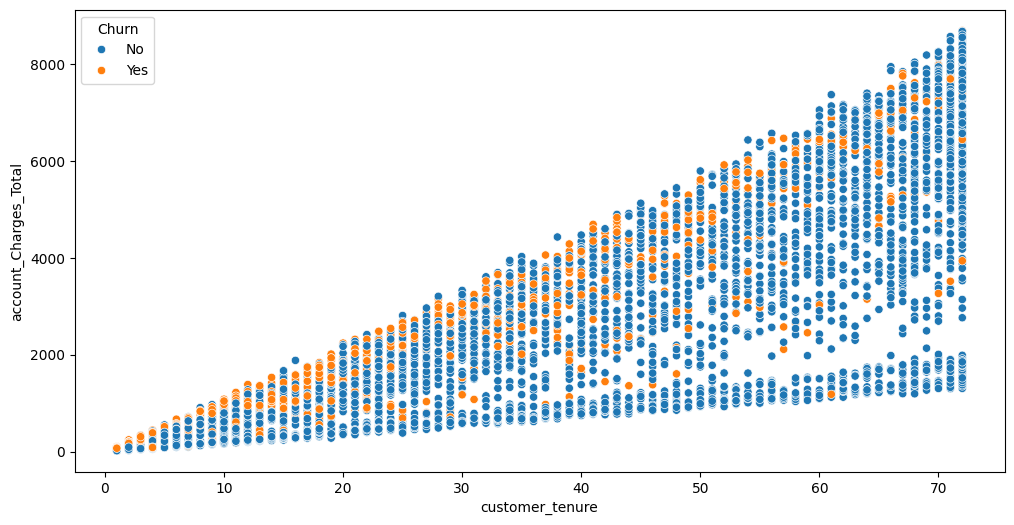

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data, y='account_Charges_Total', x='customer_tenure', hue='Churn')

<Axes: xlabel='account_Charges_Total', ylabel='account_Charges_Monthly'>

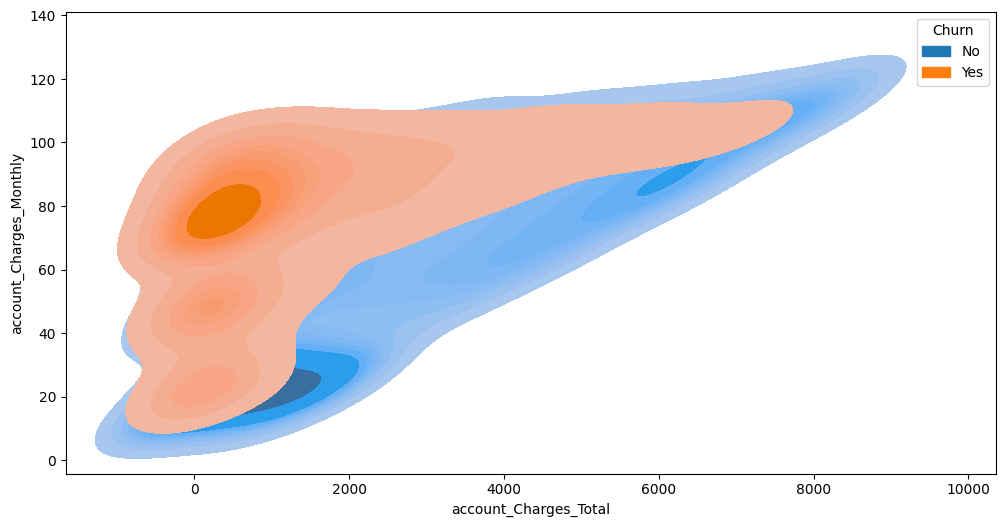

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data, x='account_Charges_Total', y='account_Charges_Monthly', hue='Churn', fill=True)

<Axes: xlabel='customer_tenure', ylabel='account_Charges_Total'>

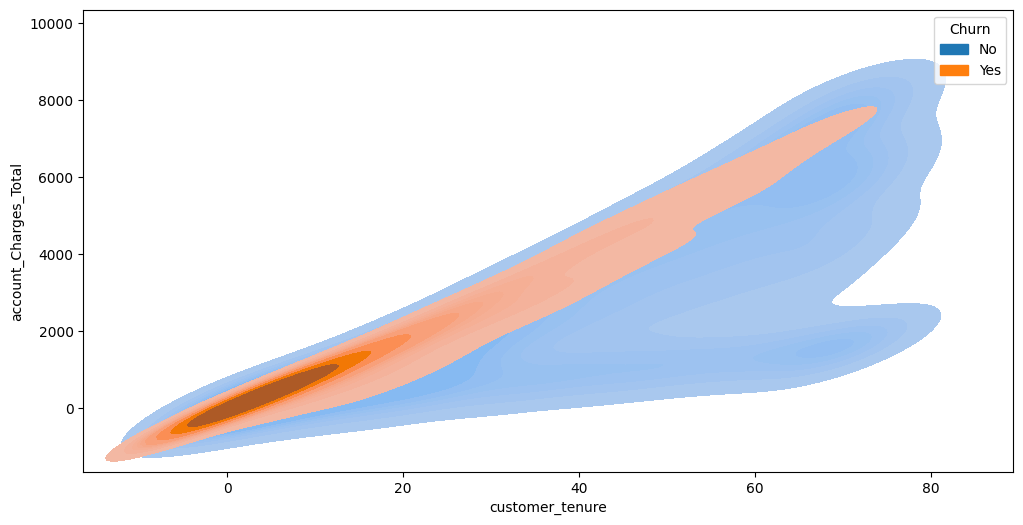

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data, y='account_Charges_Total', x='customer_tenure', hue='Churn', fill=True)

<Axes: xlabel='customer_tenure', ylabel='account_Charges_Monthly'>

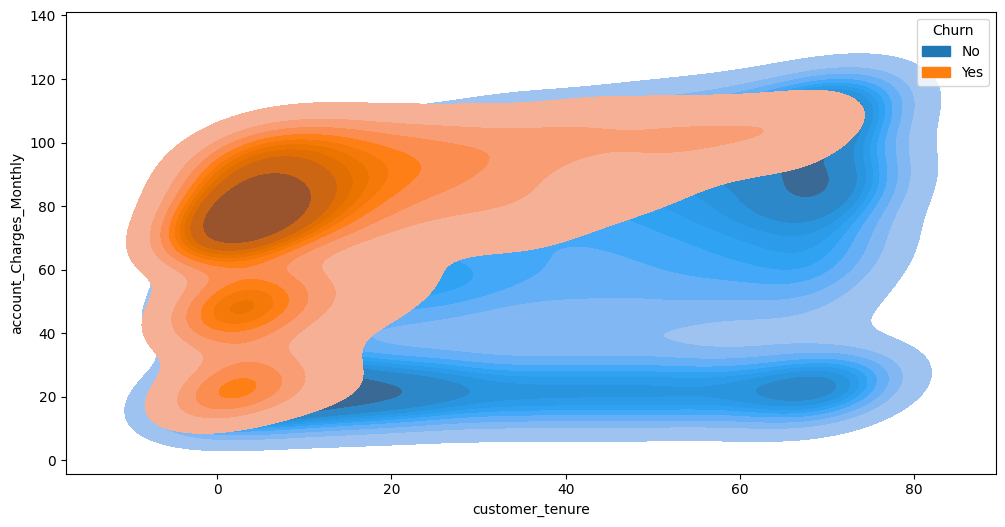

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data, y='account_Charges_Monthly', x='customer_tenure', hue='Churn', fill=True)

Introdução
O objetivo é analisar os dados de clientes da Telecomx_BR para identificar os principais motivos da evasão (Churn) e propor estratégias para aumentar a retenção.

Limpeza e Tratamento de Dados
Estruturação: Dados de um JSON aninhado foram convertidos para um formato de tabela.

Correção: A coluna de cobranças totais (account_Charges_Total) foi corrigida para o formato numérico.

Limpeza: Registros com o status de Churn indefinido foram removidos para garantir a precisão da análise.

Análise Exploratória de Dados
Perfil do Cliente: Clientes sem parceiro(a) ou dependentes tendem a cancelar mais.

Serviços: O serviço de Fibra Óptica apresenta a maior taxa de churn. Em contrapartida, a adesão a serviços adicionais como Suporte Técnico e Segurança Online reduz significativamente a evasão.

Contrato e Finanças: O churn é mais alto entre clientes com contrato Mês a Mês, baixo tempo de casa e cobranças mensais elevadas.

Conclusões e Insights
Principais Fatores de Churn: Serviço de Fibra Óptica, contratos mensais e a combinação de ser um cliente novo com um plano caro.

Principais Fatores de Retenção: Contratos de longo prazo e a contratação de serviços de valor agregado.

Insight Chave: A empresa está perdendo seus clientes de maior valor (Fibra Óptica) logo no início do relacionamento, indicando uma falha na experiência inicial.

Recomendações
Melhorar a Experiência da Fibra Óptica: Focar em um processo de onboarding para novos clientes deste serviço para garantir sua satisfação inicial.

Incentivar Contratos Longos: Oferecer descontos para clientes que migrarem de planos mensais para anuais.

Promover Serviços de Valor: Criar pacotes que incluam os serviços de maior retenção (Suporte Técnico, Segurança) junto com os planos principais.